In [1]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [69]:
import random
import numpy as np

In [48]:
f="happy\Save"

In [97]:
k=[x for x in os.listdir(f) if x.endswith(".jpg")]

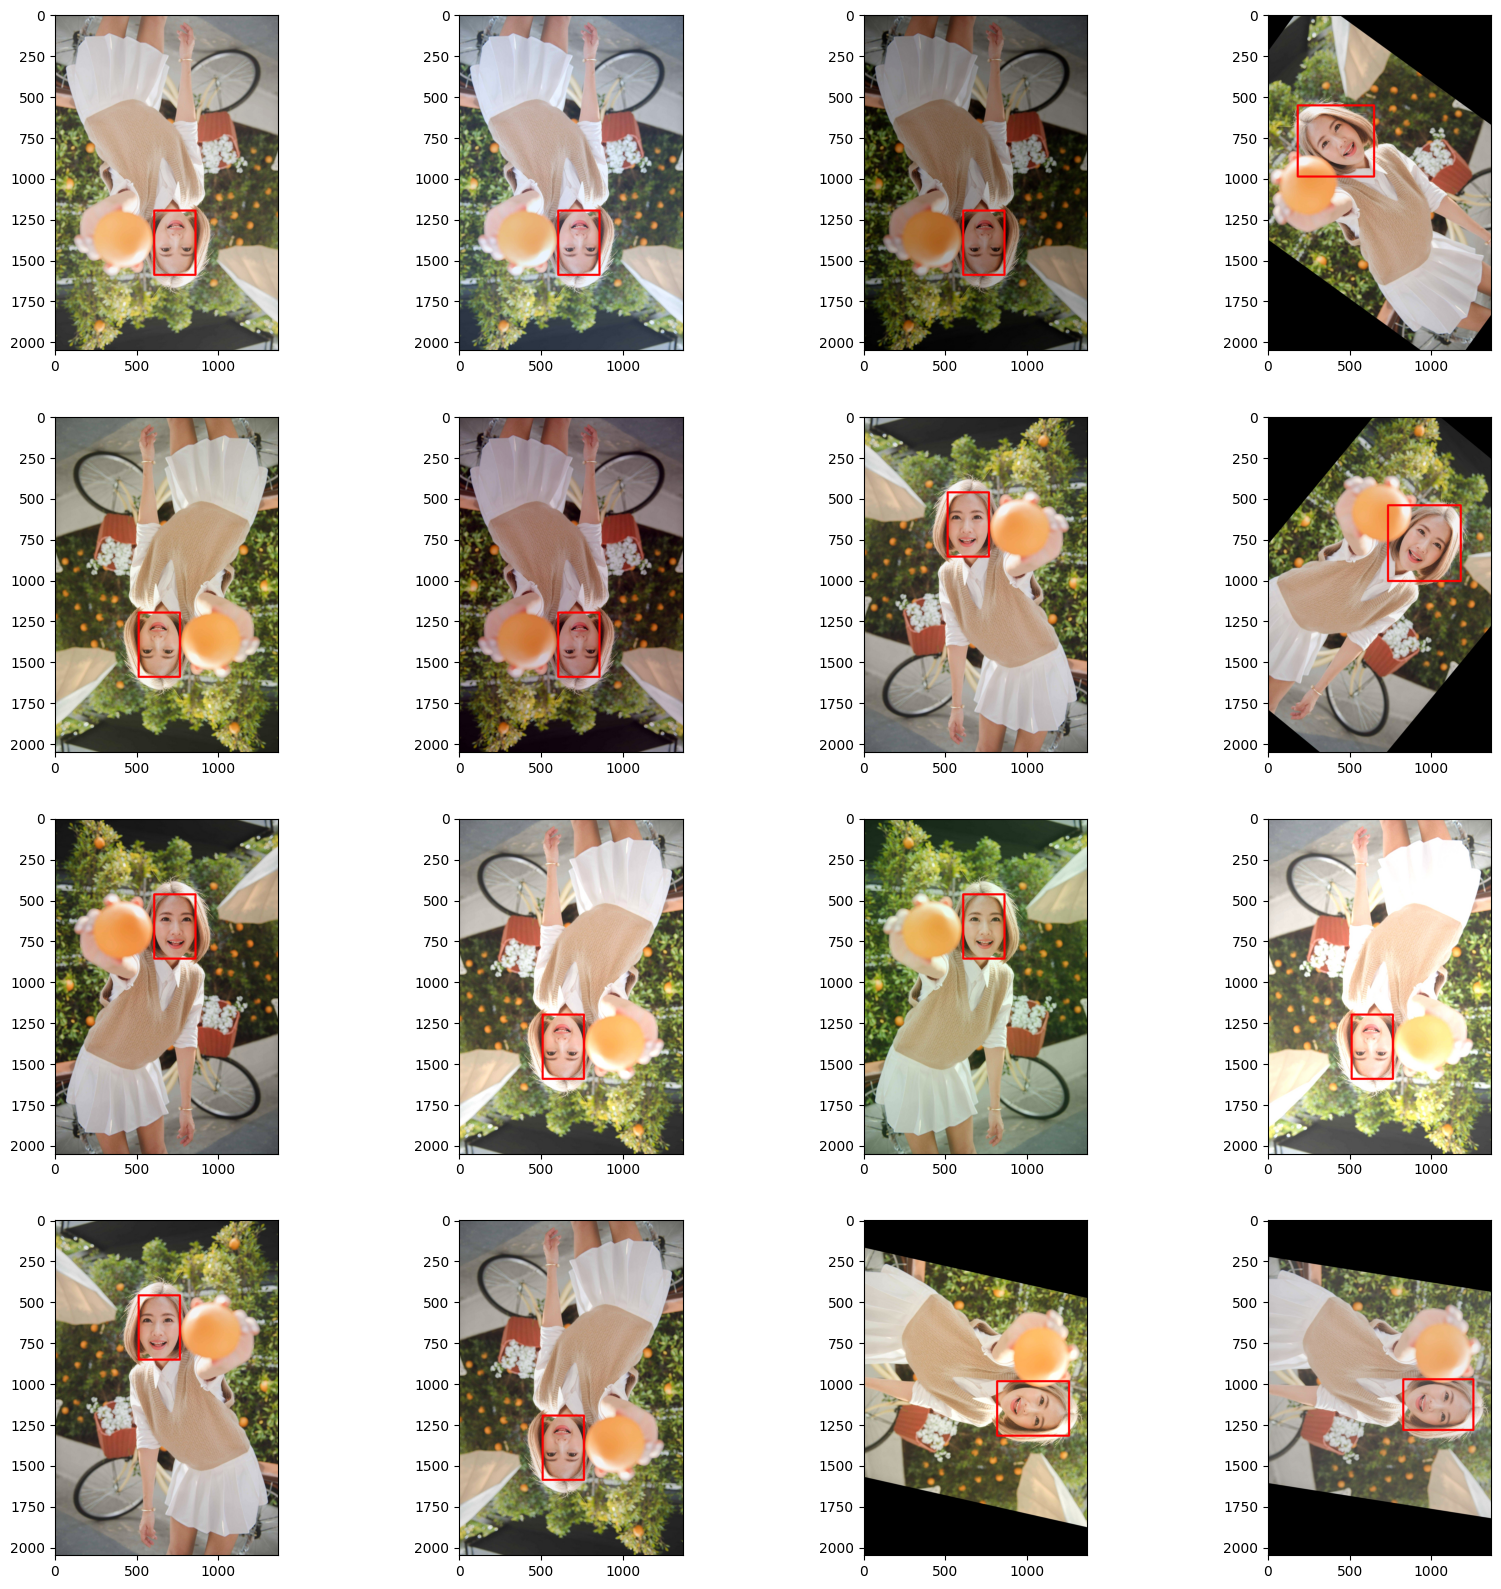

In [101]:
file=[]
pic_arr=[]
bnd=[]
time=16
for x in range(time):
    file.append(d:=k.pop(x))
    pic_arr.append(cv2.cvtColor(cv2.imread(os.path.join(f,d)),cv2.COLOR_RGB2BGR))
    fileXML = os.path.join(f,d.split(".jpg")[0]+".xml")
    xmlfile = ET.parse(fileXML)
    root = xmlfile.getroot()
    inOject = root.find("object")
    inBndbox = inOject.find("bndbox")
    xmin = inBndbox.find("xmin").text
    ymin = inBndbox.find("ymin").text
    xmax = inBndbox.find("xmax").text
    ymax = inBndbox.find("ymax").text
    e=[int(xmin),int(ymin),int(xmax),int(ymax)]
    bnd.append(e)
fig, ax = plt.subplots(ncols=4,nrows=4, figsize=(20,20))
for idx in range(time): 
    sample_image = pic_arr[idx]
    sample_coords = bnd[idx]
    
    cv2.rectangle(sample_image, 
                  sample_coords[:2],
                  sample_coords[2:], 
                        (255,0,0), 12)

    ax[idx//4][idx%4].imshow(sample_image)